In [1]:
import json

# Read COCO format annotation file
with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_train.json", "r") as f:
    annotations = json.load(f)

# View the annotation structure
print(annotations.keys()) 

dict_keys(['images', 'categories', 'annotations'])


In [2]:
import json
import pandas as pd

# Read the annotation data of Source and Target
with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_train.json", "r") as f:
    source_data = json.load(f)

with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test.json", "r") as f:
    target_data = json.load(f)

# Extract images and annotations data
source_images = pd.DataFrame(source_data["images"])
source_annotations = pd.DataFrame(source_data["annotations"])
source_categories = pd.DataFrame(source_data["categories"])

target_images = pd.DataFrame(target_data["images"])
target_annotations = pd.DataFrame(target_data["annotations"])
target_categories = pd.DataFrame(target_data["categories"])

image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_train/"
target_image_dir = "/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test/"


Width: min=2.0, max=214.0, mean=68.55457162336187
Height: min=1.0, max=164.0, mean=22.212817210817363
Area: min=6.0, max=20424.0, mean=1671.2100977198697


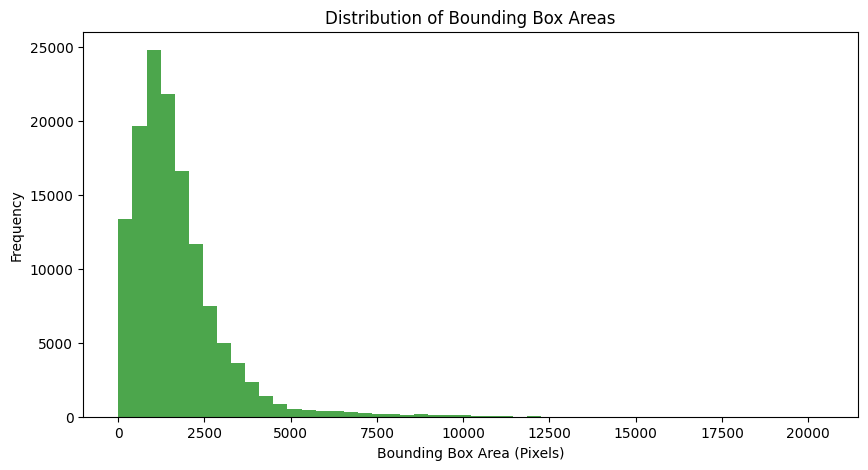

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bbox_dims = np.array([(ann["bbox"][2], ann["bbox"][3]) for ann in annotations["annotations"]])

# calculate weight, height and area
bbox_widths = bbox_dims[:, 0]
bbox_heights = bbox_dims[:, 1]
bbox_areas = bbox_widths * bbox_heights

#  result
print(f"Width: min={np.min(bbox_widths)}, max={np.max(bbox_widths)}, mean={np.mean(bbox_widths)}")
print(f"Height: min={np.min(bbox_heights)}, max={np.max(bbox_heights)}, mean={np.mean(bbox_heights)}")
print(f"Area: min={np.min(bbox_areas)}, max={np.max(bbox_areas)}, mean={np.mean(bbox_areas)}")

# area distribution
plt.figure(figsize=(10,5))
plt.hist(bbox_areas, bins=50, color='green', alpha=0.7)
plt.xlabel("Bounding Box Area (Pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Bounding Box Areas")
plt.show()

Small target proportion (area <5%): 100.00%


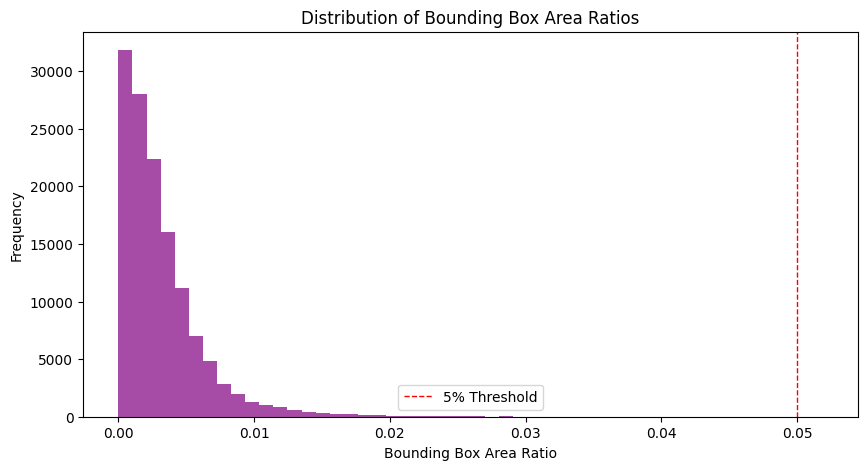

In [4]:
# extract image size
image_sizes = {img["id"]: (img["width"], img["height"]) for img in annotations["images"]} 

# Calculate the bounding box area ratio
area_ratios = []
for ann in annotations["annotations"]:
    bbox = ann["bbox"]  # bbox: [x_min, y_min, width, height]
    width, height = bbox[2], bbox[3]
    box_area = width * height
    
    # Get the image size
    img_width, img_height = image_sizes[ann["image_id"]]
    img_area = img_width * img_height
    
    # Calculate area ratio
    area_ratio = box_area / img_area
    area_ratios.append(area_ratio)

# Calculate the proportion of small objects (area <5%)
small_object_ratio = np.sum(np.array(area_ratios) < 0.05) / len(area_ratios) * 100

print(f"Small target proportion (area <5%): {small_object_ratio:.2f}%")

# Draw a histogram of area percentage
plt.figure(figsize=(10,5))
plt.hist(area_ratios, bins=50, color='purple', alpha=0.7)
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=1, label="5% Threshold")
plt.xlabel("Bounding Box Area Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Bounding Box Area Ratios")
plt.legend()
plt.show()

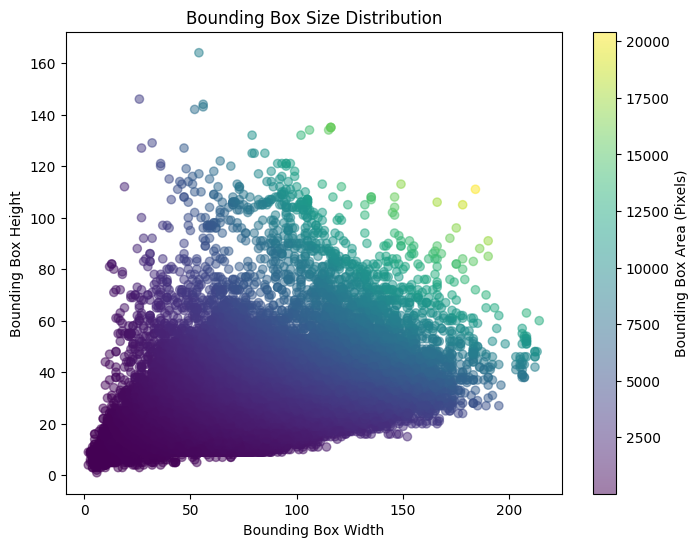

In [5]:
# Extract width and height
bbox_widths = np.array([ann["bbox"][2] for ann in annotations["annotations"]])
bbox_heights = np.array([ann["bbox"][3] for ann in annotations["annotations"]])
bbox_areas = bbox_widths * bbox_heights

# Draw a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(bbox_widths, bbox_heights, c=bbox_areas, cmap='viridis', alpha=0.5)
plt.colorbar(label="Bounding Box Area (Pixels)")
plt.xlabel("Bounding Box Width")
plt.ylabel("Bounding Box Height")
plt.title("Bounding Box Size Distribution")
plt.show()

# Background Complexity

Average color complexity: 34077.68
Color complexity standard deviation: 23909.92


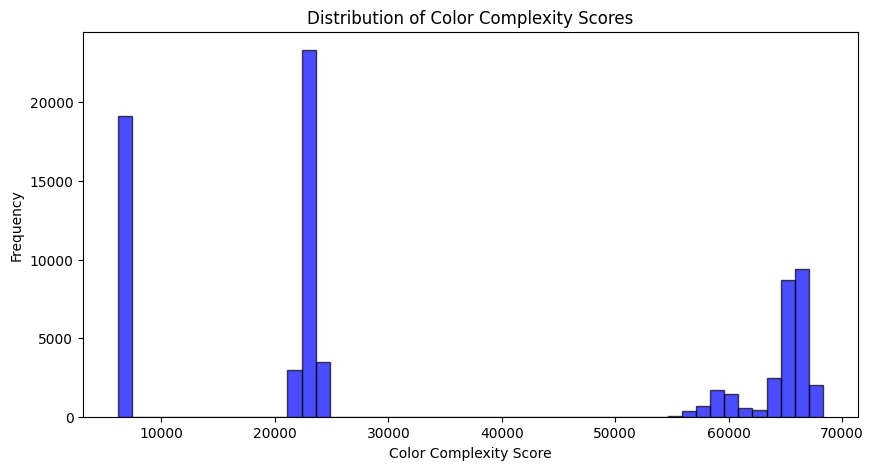

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def compute_color_complexity(image_path):
    # Read the image and convert it to HSV color space
    image = cv2.imread(image_path)
    if image is None:
        return None 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate color histogram (H channel & S channel)
    hist_hue = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([image], [1], None, [256], [0, 256])

    # Calculate color standard deviation (measure of color complexity)
    hue_std = np.std(hist_hue)
    sat_std = np.std(hist_saturation)

    return hue_std + sat_std 

# Read all images and calculate complexity
image_dir = image_dir 
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

complexity_scores = []
for img_path in image_files:
    score = compute_color_complexity(img_path)
    if score is not None:
        complexity_scores.append(score)

# Calculate statistics
mean_complexity = np.mean(complexity_scores)
std_complexity = np.std(complexity_scores)

print(f"Average color complexity: {mean_complexity:.2f}")
print(f"Color complexity standard deviation: {std_complexity:.2f}")

# Visualizing color complexity distribution
plt.figure(figsize=(10,5))
plt.hist(complexity_scores, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Color Complexity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Color Complexity Scores")
plt.show()

Average edge density: 0.6756
Edge density standard deviation: 0.5590


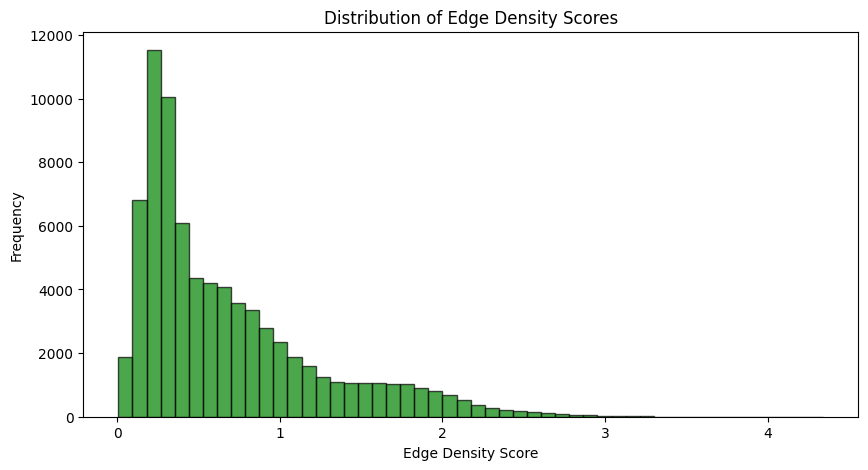

In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def compute_edge_density(image_path):
    """Calculate edge density of a single image"""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None 

    # Edge detection using the Canny algorithm
    edges = cv2.Canny(image, 100, 200)  

    # Calculate the edge pixel ratio (edge ​​density)
    edge_density = np.sum(edges) / (image.shape[0] * image.shape[1])
    return edge_density

#Batch calculate edge density of all images
image_dir = image_dir 
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

edge_density_scores = []
for img_path in image_files:
    score = compute_edge_density(img_path)
    if score is not None:
        edge_density_scores.append(score)

# Calculate statistics
mean_edge_density = np.mean(edge_density_scores)
std_edge_density = np.std(edge_density_scores)

print(f"Average edge density: {mean_edge_density:.4f}")
print(f"Edge density standard deviation: {std_edge_density:.4f}")

# Draw a distribution histogram of marginal density
plt.figure(figsize=(10,5))
plt.hist(edge_density_scores, bins=50, color='green', alpha=0.7, edgecolor='black')
plt.xlabel("Edge Density Score")
plt.ylabel("Frequency")
plt.title("Distribution of Edge Density Scores")
plt.show()

# Target Density

In [8]:
import numpy as np

image_ids = [img["id"] for img in annotations["images"]]

# Count the number of fish in each image
fish_counts_per_image = {img_id: 0 for img_id in image_ids}
for ann in annotations["annotations"]:
    fish_counts_per_image[ann["image_id"]] += 1

# Calculate the average density
total_fish = sum(fish_counts_per_image.values())
total_images = len(image_ids)
density = total_fish / total_images

print(f"Total fish population: {total_fish}")
print(f"Total number of pictures: {total_images}")
print(f"Average number of fish per image (Density): {density:.2f} Fish/Picture")

Total fish population: 132010
Total number of pictures: 76619
Average number of fish per image (Density): 1.72 Fish/Picture


In [9]:
import itertools
from scipy.spatial import distance

def compute_avg_fish_distance(annotations):
    image_fish_positions = {}  # Store the position of the fish in each image (x, y)
    
    # Read the bounding box center point
    for ann in annotations["annotations"]:
        img_id = ann["image_id"]
        x_center = ann["bbox"][0] + ann["bbox"][2] / 2  # x_min + width/2
        y_center = ann["bbox"][1] + ann["bbox"][3] / 2  # y_min + height/2
        
        if img_id not in image_fish_positions:
            image_fish_positions[img_id] = []
        image_fish_positions[img_id].append((x_center, y_center))
    
    # Calculate the average fish spacing for each image
    avg_distances = []
    for img_id, fish_positions in image_fish_positions.items():
        if len(fish_positions) < 2:
            continue  # There is only one fish, no distance is calculated

        # Calculate the pairwise Euclidean distance between all fish
        distances = [distance.euclidean(p1, p2) for p1, p2 in itertools.combinations(fish_positions, 2)]
        avg_distances.append(np.mean(distances))
    
    # Calculate the overall average distance
    overall_avg_distance = np.mean(avg_distances)
    print(f"Average distance between fish: {overall_avg_distance:.2f} Pixel")

    return overall_avg_distance

# Calculate the average distance of the fish
avg_fish_distance = compute_avg_fish_distance(annotations)

Average distance between fish: 246.84 Pixel
